## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("covid-19-seoul.csv")
df.shape

(413, 8)

In [3]:
df = df.sort_values(["연번"], ascending=False)

In [4]:
df.head()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
0,413,9552,3.28.,여('95),성남,미국,해외접촉 추정,타시도이관
1,412,9515,3.28.,여('78),서초구,스페인,해외접촉 추정,서울의료원
2,411,9545,3.28.,여('95),양천구,미국,해외접촉 추정,서남병원
3,410,9385,3.28.,여('96),강남구,미국,해외접촉 추정,생활치료센터
4,409,9574,3.28.,남('00),강남구,영국,해외접촉 추정,생활치료센터


In [5]:
df.tail()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
408,5,9,1.31.,여(‵92),성북구,-,#5 접촉,서울의료원(퇴원)
409,4,7,1.30.,남(‵91),마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
410,3,6,1.30.,남(‵64),종로구,-,#3 접촉,서울대학교병원(퇴원)
411,2,5,1.30.,남(‵87),중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
412,1,2,1.23.,남(‵64),강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


## 시각화 도구 불러오기

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(font="Malgun Gothic")
sns.set(font="AppleGothic")
plt.rc("axes", unicode_minus=False)

### 시각화 선명하게 설정하기

In [7]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## 거주지별 확진자

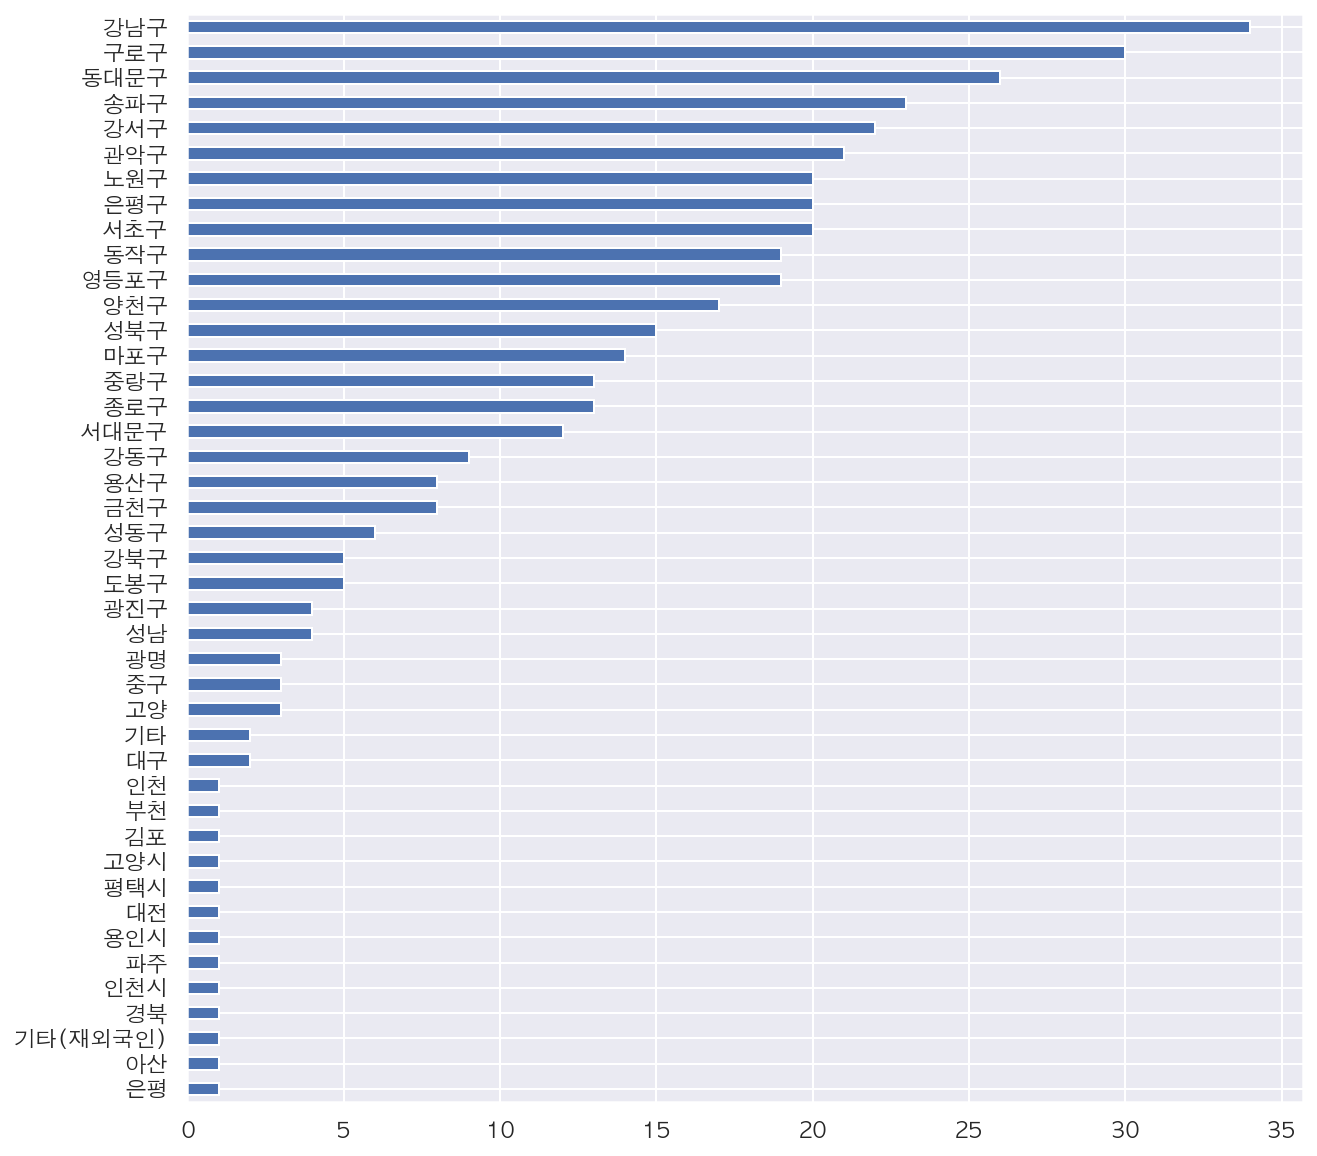

In [8]:
gu_count = df["거주지"].value_counts().sort_values()
gu_count.plot.barh(figsize=(10, 10))

In [9]:
import json

file_path = 'seoul_municipalities_geo_simple.json'
geo_json = json.load(open(file_path, encoding="utf-8"))
geo_json["features"][0]['properties']["name"]

'강동구'

In [10]:
gu = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
gu[:5]

['강남구', '강동구', '강북구', '강서구', '관악구']

In [11]:
df_gu = gu_count.reset_index()
df_gu.columns = ["구", "환자수"]
df_gu.head()

,구,환자수
0,은평,1
1,아산,1
2,기타(재외국인),1
3,경북,1
4,인천시,1


In [12]:
df_gu["구"] = df_gu["구"].replace("은평", "은평구")
df_gu["지역"] = df_gu["구"].map(lambda x : x if x in gu else "타지역")
df_gu[["구", "지역"]].head()

,구,지역
0,은평구,은평구
1,아산,타지역
2,기타(재외국인),타지역
3,경북,타지역
4,인천시,타지역


In [13]:
df_gu_etc = df_gu.groupby("지역")["환자수"].sum().sort_values()
df_gu_etc.head()

지역
중구     3
광진구    4
강북구    5
도봉구    5
성동구    6
Name: 환자수, dtype: int64

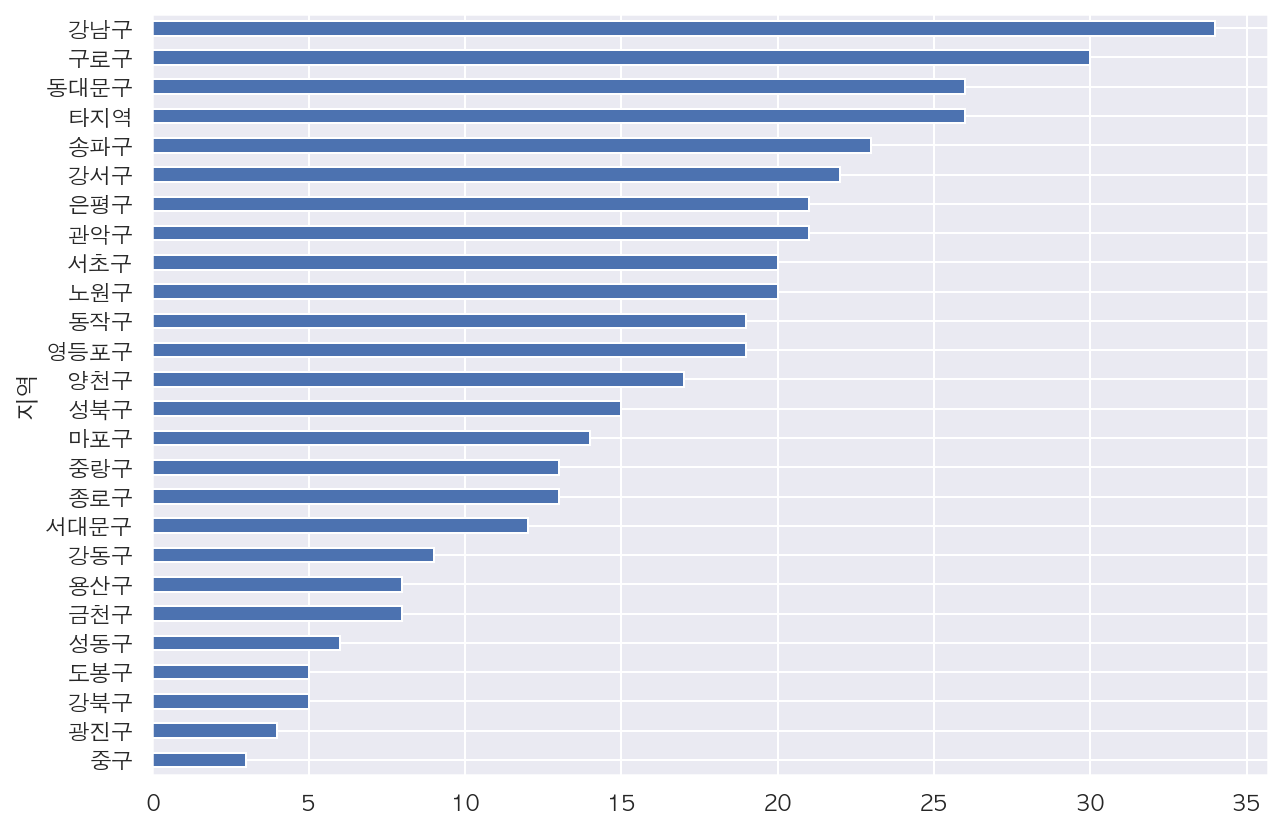

In [14]:
df_gu_etc.plot.barh(figsize=(10, 7))

In [15]:
import folium

m = folium.Map([37.562, 126.988], zoom_start=11, tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=gu_count,
    columns=['구', '환자수'],
    key_on='feature.properties.name',
    fill_color='Oranges',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='환자수'
).add_to(m)

m

## 조치사항

In [16]:
df["조치사항"].value_counts()

서울의료원          102
서남병원            70
보라매병원           54
생활치료센터          28
서울의료원(퇴원)       24
서남병원(퇴원)        14
국립중앙의료원(퇴원)     13
국립중앙의료원         11
보라매병원(퇴원)       11
서북병원            11
서울대학교병원(퇴원)     10
확인중              5
타시도이관            5
서북병원(퇴원)         5
서울성모병원           4
중앙대학교병원(퇴원)      4
타시도 이관           3
타시도이관(퇴원)        3
삼육서울병원           3
상계백병원(퇴원)        3
중앙대학교병원          3
순천향서울병원          2
한일병원             2
한일병원(퇴원)         2
고대구로병원           2
서울아산병원           2
한양대학교병원(퇴원)      2
순천향대학병원          2
은평성모병원           1
서울백병원            1
경희대학교병원          1
순천향서울병원(퇴원)      1
고대안암병원           1
상계병원             1
강남세브란스병원         1
고대구로병원(퇴원)       1
상계백병원            1
세브란스병원           1
서울대학교병원          1
국립중앙의료병원         1
강남세브란스           1
Name: 조치사항, dtype: int64

In [17]:
df["확진일"].value_counts()

3.10.     46
3.9.      26
3.28.     22
3.11.     17
3.20.     17
3.19.     17
3.27.     15
2.25.     15
3.24.     14
3.26.     14
3.16.     13
3.25.     13
2.27.     12
3.12.     12
3.18.     11
2.26.     10
3.8.      10
3.13.      9
3.21.      8
2.28.      8
3.14.      8
3.7.       7
3.6.       7
3.2.       6
3.15.      6
3.1.       6
3.22.      6
3.4.       5
3.23.      5
2.29.      5
2.20.      5
2.23.      4
2.22.      4
3.17.      4
2.24.      3
1.31.      3
1.30.      3
2.21.      2
2.5.       2
2.19.      2
2.16.      2
2.25       1
3.3.       1
2.27       1
1.23.      1
2.7.       1
2.2.       1
2.6.       1
2.24..     1
3.5.       1
Name: 확진일, dtype: int64

In [18]:
df["확진일자"] = pd.to_datetime("2020"+ "-" + df["확진일"].str.replace(".", "-"))
df["확진일자"].head()

0   2020-03-28
1   2020-03-28
2   2020-03-28
3   2020-03-28
4   2020-03-28
Name: 확진일자, dtype: datetime64[ns]

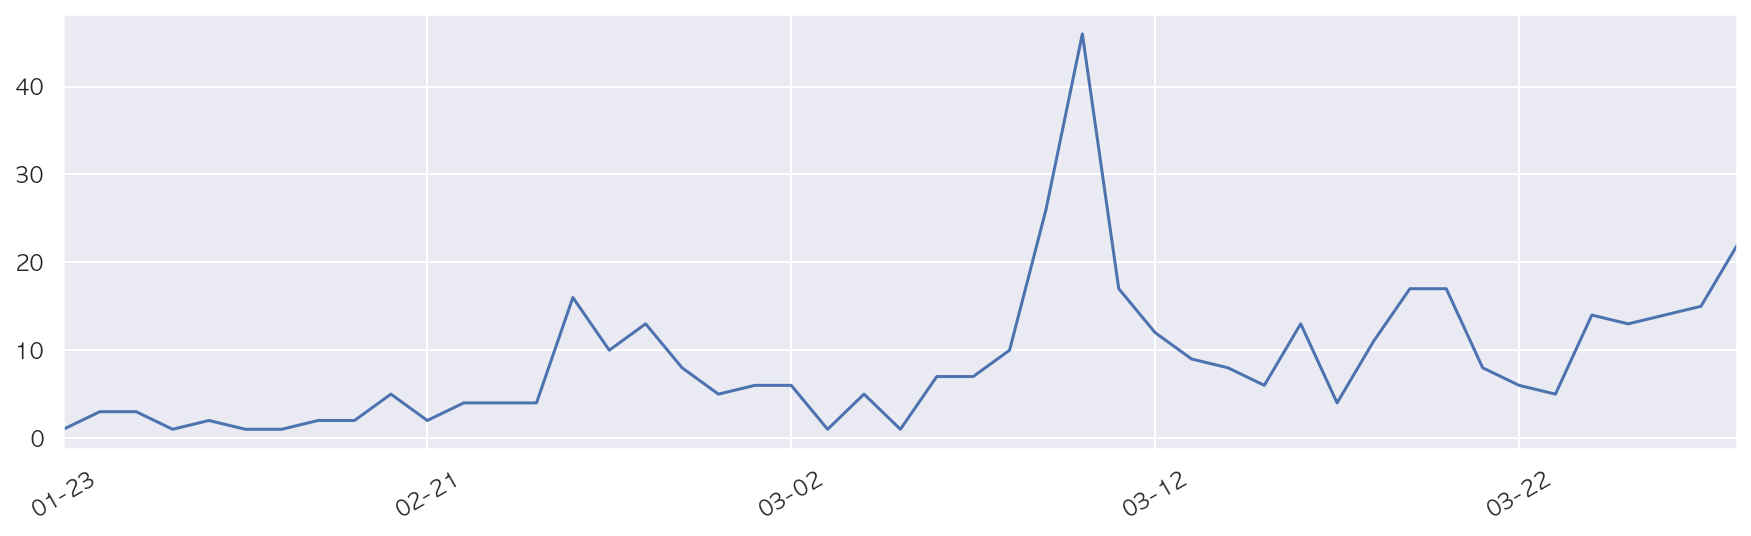

In [19]:
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df["월일"].value_counts().sort_index().plot(figsize=(15, 4), rot=30)

In [20]:
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[0]

1

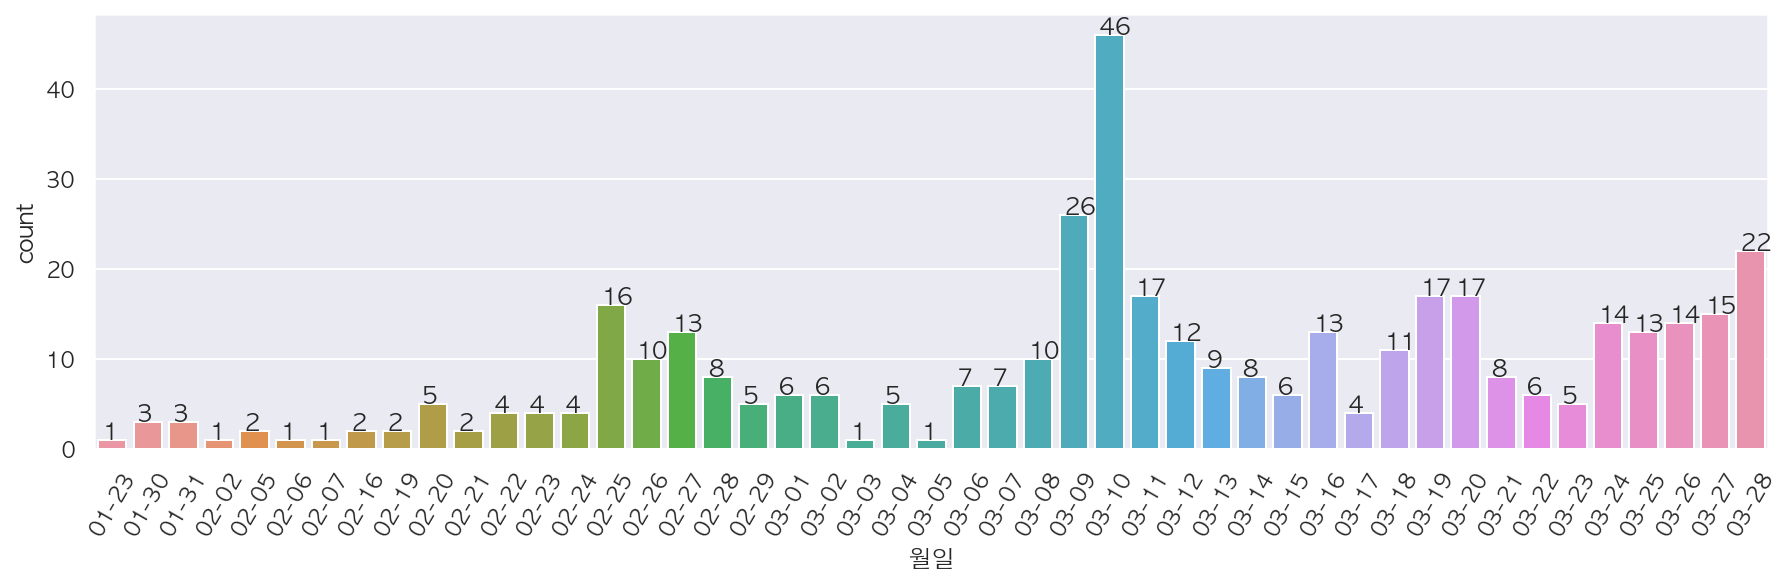

In [21]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
g = sns.countplot(data=df.sort_values(by="월일"), x="월일")

for i in range(len(day_count)):
    g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

## 누적확진

In [22]:
cum = df.groupby(["확진일자"])["연번"].count()
cum

확진일자
2020-01-23     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
2020-02-06     1
2020-02-07     1
2020-02-16     2
2020-02-19     2
2020-02-20     5
2020-02-21     2
2020-02-22     4
2020-02-23     4
2020-02-24     4
2020-02-25    16
2020-02-26    10
2020-02-27    13
2020-02-28     8
2020-02-29     5
2020-03-01     6
2020-03-02     6
2020-03-03     1
2020-03-04     5
2020-03-05     1
2020-03-06     7
2020-03-07     7
2020-03-08    10
2020-03-09    26
2020-03-10    46
2020-03-11    17
2020-03-12    12
2020-03-13     9
2020-03-14     8
2020-03-15     6
2020-03-16    13
2020-03-17     4
2020-03-18    11
2020-03-19    17
2020-03-20    17
2020-03-21     8
2020-03-22     6
2020-03-23     5
2020-03-24    14
2020-03-25    13
2020-03-26    14
2020-03-27    15
2020-03-28    22
Name: 연번, dtype: int64

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [23]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1]["확진일자"]
last_day = df.iloc[0]["확진일자"]
first_day, last_day

(Timestamp('2020-01-23 00:00:00'), Timestamp('2020-03-28 00:00:00'))

In [24]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
               '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
      

In [25]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
days = pd.DataFrame({"확진일자": days})
days.head()

,확진일자
0,2020-01-23
1,2020-01-24
2,2020-01-25
3,2020-01-26
4,2020-01-27


In [26]:
all_day = days.merge(cum, left_on="확진일자", right_on=cum.index, how="left")
all_day = all_day.rename(columns={"연번":"확진수"})
all_day.head()

,확진일자,확진수
0,2020-01-23,1.0
1,2020-01-24,NaN
2,2020-01-25,NaN
3,2020-01-26,NaN
4,2020-01-27,NaN


## 누적 확진자 수 구하기

In [27]:
all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-23,1.0,1.0
1,2020-01-24,NaN,1.0
2,2020-01-25,NaN,1.0
3,2020-01-26,NaN,1.0
4,2020-01-27,NaN,1.0
...,...,...,...
61,2020-03-24,14.0,349.0
62,2020-03-25,13.0,362.0
63,2020-03-26,14.0,376.0
64,2020-03-27,15.0,391.0


In [28]:
all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x: x[-5:])
all_day["일자"].head()

0    01-23
1    01-24
2    01-25
3    01-26
4    01-27
Name: 일자, dtype: object

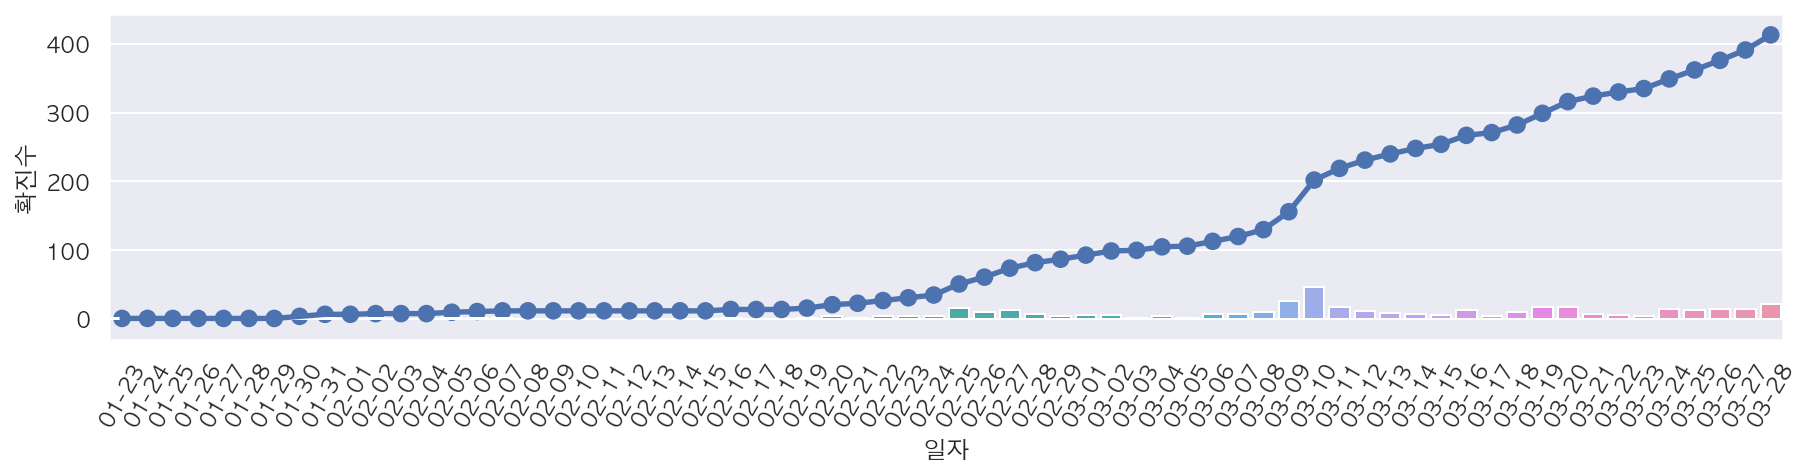

In [29]:
plt.figure(figsize=(15, 3))
plt.xticks(rotation=60)
sns.pointplot(data=all_day, x="일자", y="누적확진")
sns.barplot(data=all_day, x="일자", y="확진수")

In [30]:
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-23,1.0,1.0,01-23,1,3
1,2020-01-24,NaN,1.0,01-24,1,4
2,2020-01-25,NaN,1.0,01-25,1,5
3,2020-01-26,NaN,1.0,01-26,1,6
4,2020-01-27,NaN,1.0,01-27,1,0


## 요일별 확진 수 

In [31]:
all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum().unstack()
all_day_week.style.background_gradient(cmap='PuBu')

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,4,3,0,0
2,4,16,14,19,11,9,7
3,50,65,46,44,48,45,28


## 접촉력

In [32]:
df["접촉력"].value_counts()

해외접촉 추정       89
구로구 콜센터 관련    60
확인중           33
콜센터직원 접촉      33
타시도 확진자 접촉    22
              ..
확잍중            1
#7914 접촉       1
#6727 첩촉       1
해외 접촉(추정)      1
#8044 접촉       1
Name: 접촉력, Length: 77, dtype: int64

In [33]:
df["접촉경로"] = df["접촉력"]
df.loc[df["접촉력"].str.contains("접촉자"), "접촉경로"] = "접촉자"
df.loc[df["접촉력"].str.contains("은평성모"), "접촉경로"] = "은평성모병원"
df.loc[df["접촉력"].str.contains("가족"), "접촉경로"] = "가족"
df.loc[df["접촉력"].str.contains("부동산"), "접촉경로"] = "부동산중개법인"
df.loc[df["접촉력"].str.contains("확잍중"), "접촉경로"] = "확인중"

In [34]:
df["접촉경로"].value_counts()

해외접촉 추정         89
구로구 콜센터 관련      60
확인중             34
콜센터직원 접촉        33
타시도 확진자 접촉      22
                ..
#8079 접촉         1
대구 방문(명성교회)      1
#7280 접촉(추정)     1
#8196 접촉         1
대구 거주자           1
Name: 접촉경로, Length: 65, dtype: int64

## 가장 많은 전파가 일어난 번호

In [35]:
import re

re.sub("[^0-9]", "", "#7265 접촉(추정)")

'7265'

In [36]:
def get_number(text):
    return re.sub("[^0-9]", "", text)
    
get_number("#7265 접촉(추정)")

'7265'

In [37]:
df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
# contact = contact.drop(0)
contact.columns = ["환자번호", "전파수"]
contact.head()

,환자번호,전파수
0,,359
1,6,4
2,8791,3
3,780,3
4,8486,3


In [38]:
top_contact = contact.merge(df, left_on="환자번호", right_on="환자")
top_contact.head()

,환자번호,전파수,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항,확진일자,월일,접촉경로,접촉번호
0,6,4,3,6,1.30.,남(‵64),종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,01-30,#3 접촉,3
1,8791,3,305,8791,3.20.,남('97),중랑구,필리핀,해외접촉 추정,국립중앙의료원,2020-03-20,03-20,해외접촉 추정,
2,780,3,31,780,2.22.,남('65),송파구,,대구 방문,중앙대학교병원(퇴원),2020-02-22,02-22,대구 방문,
3,8486,3,279,8486,3.18.,남('29),용산구,-,확인중,중앙대학교병원,2020-03-18,03-18,확인중,
4,794,2,33,794,2.24.,여('70),송파구,-,#780 접촉,서울의료원,2020-02-24,02-24,#780 접촉,780


In [39]:
top_contactor = top_contact.iloc[0, 0]
top_contactor

'6'

In [40]:
df[df["접촉경로"].str.contains(top_contactor)]

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항,확진일자,월일,접촉경로,접촉번호
7,406,9571,3.28.,여('80),동작구,-,#8669 접촉,보라매병원,2020-03-28,03-28,#8669 접촉,8669
69,344,9115,3.24.,남('59),강남구,-,#8646 접촉,서울성모병원,2020-03-24,03-24,#8646 접촉,8646
103,310,8792,3.20.,여('60),성북구,-,#8063 접촉,서울의료원,2020-03-20,03-20,#8063 접촉,8063
106,307,8713,3.20.,남('60),노원구,-,#8486 접촉,서울의료원,2020-03-20,03-20,#8486 접촉,8486
125,288,8601,3.19.,여('61),노원구,-,#8486 접촉,서울의료원,2020-03-19,03-19,#8486 접촉,8486
129,284,8617,3.19.,여('34),용산구,-,#8486 접촉,중앙대학교병원,2020-03-19,03-19,#8486 접촉,8486
150,263,8268,3.16.,남('01),구로구,-,#8196 접촉,서울의료원,2020-03-16,03-16,#8196 접촉,8196
222,191,7647,3.10.,여('90),은평구,"프랑스, 스페인",#6959 접촉(추정),서울의료원,2020-03-10,03-10,#6959 접촉(추정),6959
286,127,7280,3.8.,남('69),강남구,-,#6727 첩촉,보라매병원(퇴원),2020-03-08,03-08,#6727 첩촉,6727
394,19,112,2.20.,여(‵41),종로구,-,#136 접촉,서울대학교병원(퇴원),2020-02-20,02-20,#136 접촉,136


In [41]:
pd.options.display.max_rows = 100

In [42]:
df_call = df[df["접촉경로"].str.contains("콜센터")]
print(df_call.shape)
df_call["접촉경로"].value_counts()

(96, 12)


구로구 콜센터 관련    60
콜센터직원 접촉      33
콜센터직원 접촉       2
구로구 콜센터 접촉     1
Name: 접촉경로, dtype: int64

## 조치사항

In [43]:
df["조치사항"].value_counts()

서울의료원          102
서남병원            70
보라매병원           54
생활치료센터          28
서울의료원(퇴원)       24
서남병원(퇴원)        14
국립중앙의료원(퇴원)     13
국립중앙의료원         11
보라매병원(퇴원)       11
서북병원            11
서울대학교병원(퇴원)     10
확인중              5
타시도이관            5
서북병원(퇴원)         5
서울성모병원           4
중앙대학교병원(퇴원)      4
타시도 이관           3
타시도이관(퇴원)        3
삼육서울병원           3
상계백병원(퇴원)        3
중앙대학교병원          3
순천향서울병원          2
한일병원             2
한일병원(퇴원)         2
고대구로병원           2
서울아산병원           2
한양대학교병원(퇴원)      2
순천향대학병원          2
은평성모병원           1
서울백병원            1
경희대학교병원          1
순천향서울병원(퇴원)      1
고대안암병원           1
상계병원             1
강남세브란스병원         1
고대구로병원(퇴원)       1
상계백병원            1
세브란스병원           1
서울대학교병원          1
국립중앙의료병원         1
강남세브란스           1
Name: 조치사항, dtype: int64

In [44]:
df["퇴원"] = df["조치사항"].str.contains("퇴원")
df["병원"] = df["조치사항"].str.replace("\(퇴원\)", "")

In [45]:
df["퇴원"].value_counts()

False    320
True      93
Name: 퇴원, dtype: int64

In [46]:
df["퇴원"].value_counts(normalize=True)

False    0.774818
True     0.225182
Name: 퇴원, dtype: float64

In [47]:
df["병원"].value_counts()

서울의료원       126
서남병원         84
보라매병원        65
생활치료센터       28
국립중앙의료원      24
서북병원         16
서울대학교병원      11
타시도이관         8
중앙대학교병원       7
확인중           5
한일병원          4
서울성모병원        4
상계백병원         4
고대구로병원        3
순천향서울병원       3
타시도 이관        3
삼육서울병원        3
서울아산병원        2
순천향대학병원       2
한양대학교병원       2
경희대학교병원       1
국립중앙의료병원      1
상계병원          1
서울백병원         1
세브란스병원        1
고대안암병원        1
강남세브란스        1
강남세브란스병원      1
은평성모병원        1
Name: 병원, dtype: int64

## 성별

In [48]:
df["성별"] = df["성별(출생년)"].map(lambda x : x.split("(")[0])

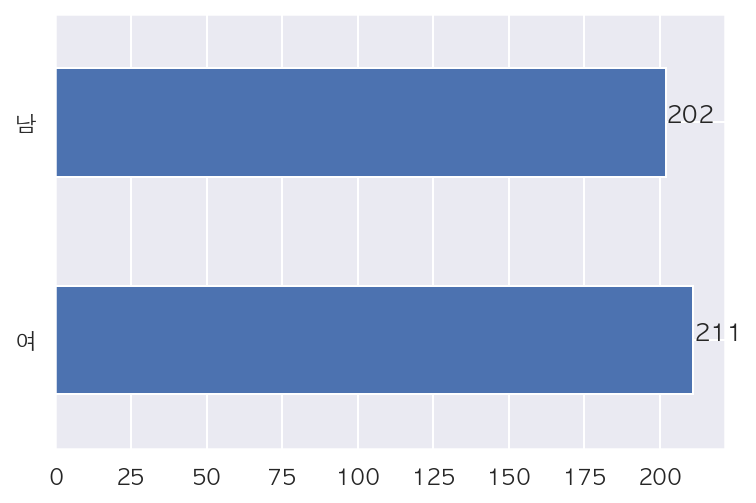

In [49]:
gender_count = df["성별"].value_counts()
g = gender_count.plot.barh()
for i, val in enumerate(gender_count):
    g.text(x=val, y=i, s=val)

## 연령

In [50]:
# df["출생년"] = df["성별(출생년)"].map(lambda x : 
#                   x.split("(")[-1].replace("'", "").replace("‵", "").replace(")", "").strip())

df["출생년"] = df["성별(출생년)"].map(get_number)

df.loc[df["출생년"].astype(int) > 20, "출생년"] = "19" + df["출생년"]
df.loc[df["출생년"].astype(int) <= 20, "출생년"] = "20" + df["출생년"]

In [51]:
df["출생년"].value_counts().head()

1969    15
1994    15
1999    13
1996    13
1982    13
Name: 출생년, dtype: int64

In [52]:
df["출생년"] = df["출생년"].astype(int)
df["나이"] = 2020 - df["출생년"]

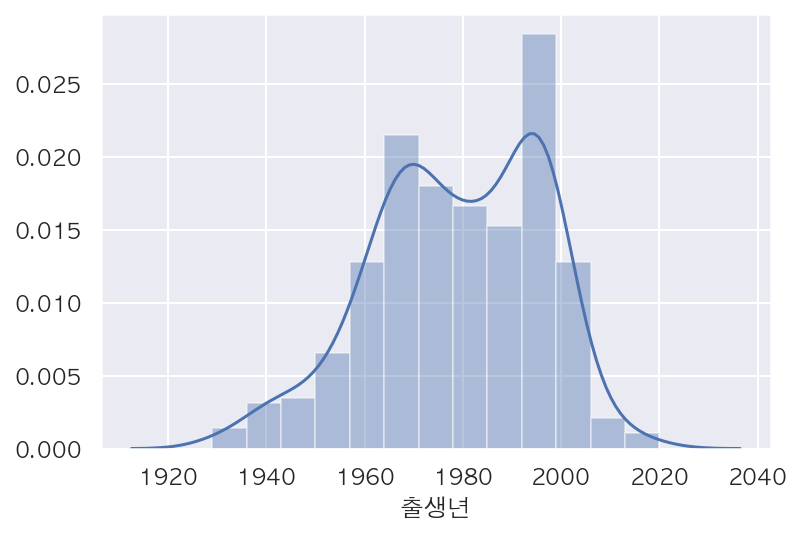

In [53]:
sns.distplot(df["출생년"])

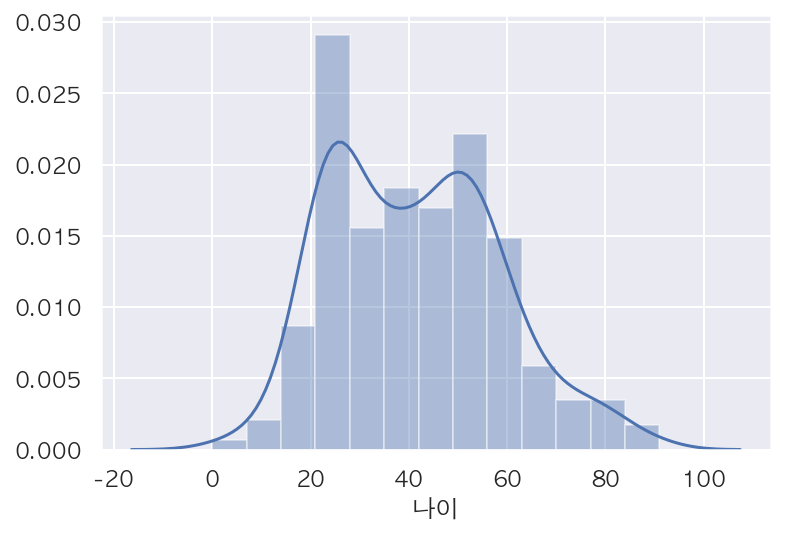

In [54]:
sns.distplot(df["나이"])

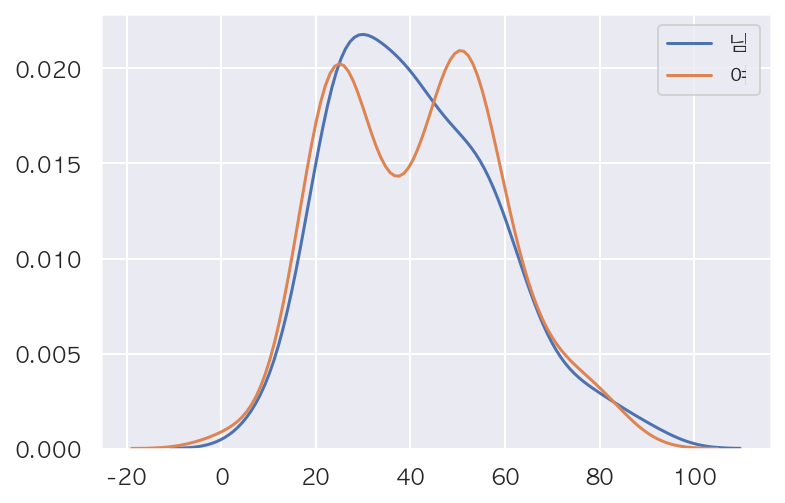

In [55]:
male_age = df.loc[df["성별"] == "남", "나이"]
female_age = df.loc[df["성별"] == "여", "나이"]
sns.kdeplot(male_age, label="남")
sns.kdeplot(female_age, label="여")

## 퇴원여부

In [56]:
df["퇴원"].value_counts()

False    320
True      93
Name: 퇴원, dtype: int64

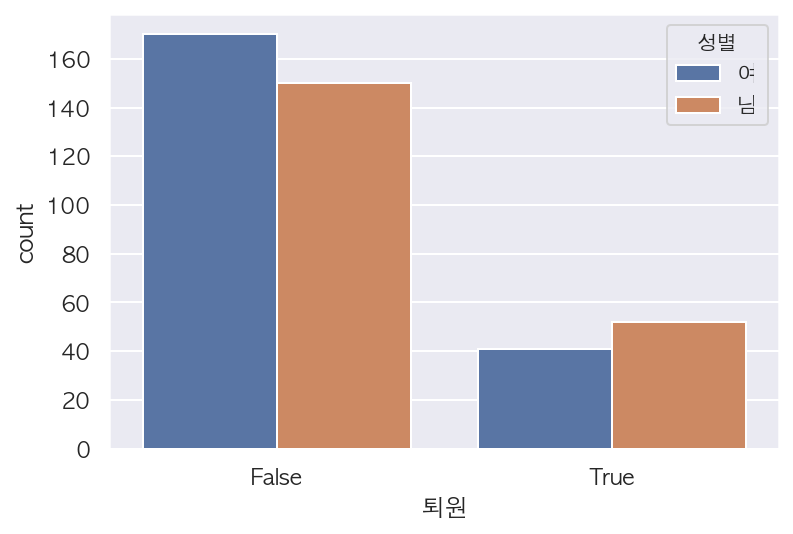

In [57]:
sns.countplot(data=df, x="퇴원", hue="성별")

## 여행력

In [58]:
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"] = df["해외"].replace("", np.nan)
df["해외"].value_counts()

미국                           34
영국                           15
필리핀                          10
태국                            6
프랑스                           6
스페인                           5
중국 우한시                        4
프랑스, 독일                       2
이탈리아                          2
이탈리아, 프랑스                     2
필리핀, 마닐라                      2
폴란드                           2
영국, 프랑스                       1
우한 교민                         1
인도네시아                         1
중국 청도                         1
독일,프랑스                        1
캐나다                           1
베트남                           1
우한교민                          1
말레이시아                         1
브라질                           1
모로코, 프랑스, 오스트리아               1
이탈리아, 독일, 홍콩                  1
스페인, 카타르                      1
프랑스, 스페인                      1
일본                            1
아르헨티나, 볼리비아, 브라질              1
체코, 헝가리, 오스트리아, 이탈리아, 프랑스     1
멕시코, 미국                       1
싱가포르                          1
미국, 캐나다 

In [59]:
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(114, 18)

In [60]:
df_oversea["해외"] = df_oversea["해외"].replace("우한교민", "우한 교민")
df_oversea["해외"].value_counts()

미국                           34
영국                           15
필리핀                          10
태국                            6
프랑스                           6
스페인                           5
중국 우한시                        4
폴란드                           2
프랑스, 독일                       2
우한 교민                         2
필리핀, 마닐라                      2
이탈리아, 프랑스                     2
이탈리아                          2
캐나다                           1
체코, 헝가리, 오스트리아, 이탈리아, 프랑스     1
베트남                           1
브라질                           1
중국 청도                         1
영국, 프랑스                       1
인도네시아                         1
독일,프랑스                        1
말레이시아                         1
일본                            1
모로코, 프랑스, 오스트리아               1
이탈리아, 독일, 홍콩                  1
스페인, 카타르                      1
프랑스, 스페인                      1
아르헨티나, 볼리비아, 브라질              1
멕시코, 미국                       1
싱가포르                          1
미국, 캐나다                       1
스페인, 프랑스

In [61]:
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드"
europe = europe.replace(", ", "|")
europe

'체코|헝가리|오스트리아|이탈리아|프랑스|모로코|독일|스페인|영국|폴란드'

In [62]:
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea["해외"].value_counts()

유럽                      44
미국                      34
필리핀                     10
태국                       6
중국 우한시                   4
필리핀, 마닐라                 2
우한 교민                    2
캐나다                      1
말레이시아                    1
멕시코, 미국                  1
중국 청도                    1
브라질                      1
아르헨티나, 볼리비아, 브라질         1
싱가포르                     1
베트남                      1
브라질, 아르헨티아, 칠레, 볼리비아     1
미국, 캐나다                  1
일본                       1
인도네시아                    1
Name: 해외, dtype: int64

In [63]:
day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count().groupby(level=[1]).cumsum()
day_oversea.head()

확진일자        해외    
2020-01-23  중국 우한시    1
2020-01-30  중국 우한시    3
2020-02-02  우한 교민     1
2020-02-05  싱가포르      1
2020-02-06  중국 우한시    4
Name: 연번, dtype: int64

In [64]:
day_oversea = day_oversea.reset_index()
day_oversea = day_oversea.rename(columns={'연번':'확진자수'})
print(day_oversea.shape)
day_oversea.head()

(61, 3)


,확진일자,해외,확진자수
0,2020-01-23,중국 우한시,1
1,2020-01-30,중국 우한시,3
2,2020-02-02,우한 교민,1
3,2020-02-05,싱가포르,1
4,2020-02-06,중국 우한시,4


In [65]:
oversea_count = df_oversea["해외"].value_counts(ascending=True)
oversea_count

인도네시아                    1
일본                       1
미국, 캐나다                  1
브라질, 아르헨티아, 칠레, 볼리비아     1
베트남                      1
싱가포르                     1
아르헨티나, 볼리비아, 브라질         1
브라질                      1
중국 청도                    1
멕시코, 미국                  1
말레이시아                    1
캐나다                      1
우한 교민                    2
필리핀, 마닐라                 2
중국 우한시                   4
태국                       6
필리핀                     10
미국                      34
유럽                      44
Name: 해외, dtype: int64

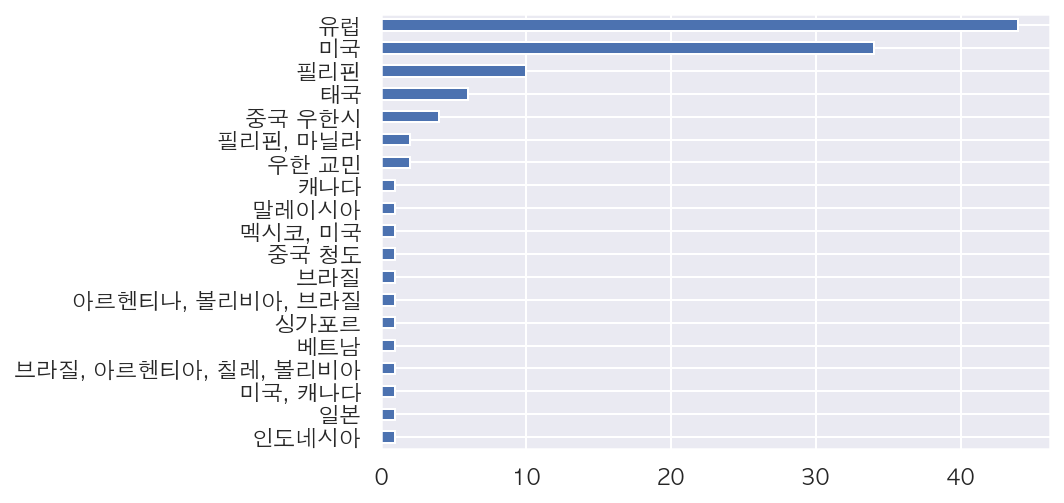

In [66]:
oversea_count.plot.barh()

In [67]:
day_oversea.iloc[-1, 0]

Timestamp('2020-03-28 00:00:00')

In [68]:
for i, val in enumerate(oversea_count[-5:]):
    num = -5 + i
    print(day_oversea["확진일자"].nunique(), i, num, val)

31 0 -5 4
31 1 -4 6
31 2 -3 10
31 3 -2 34
31 4 -1 44


In [69]:
oversea_count.index[-1]

'유럽'

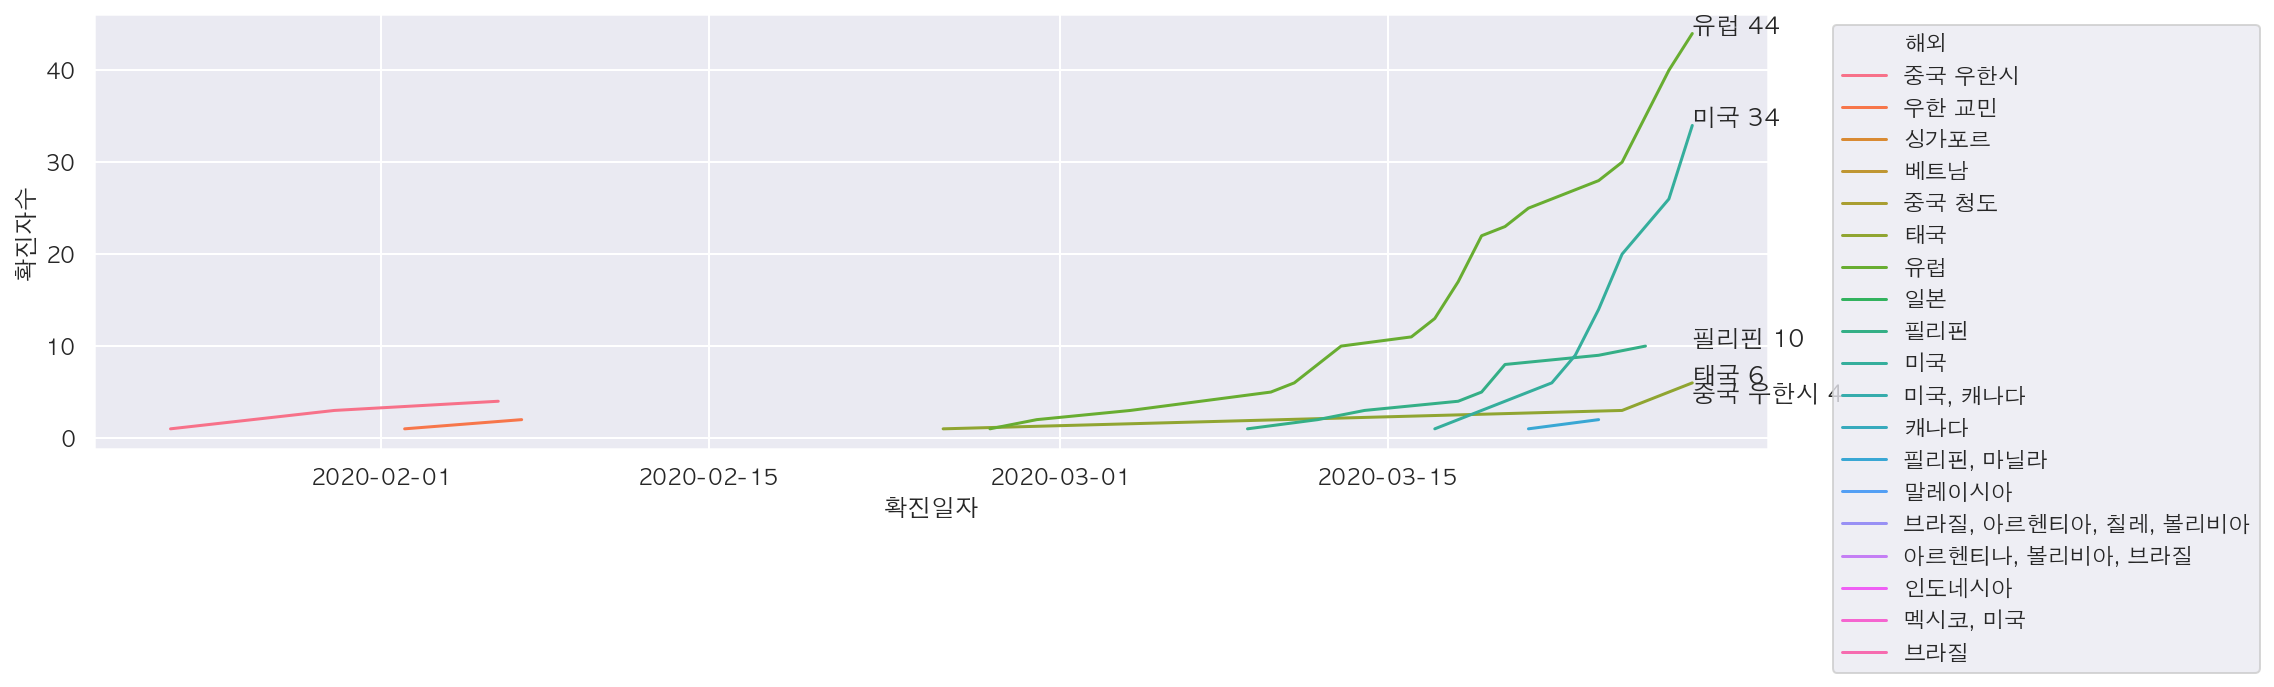

In [70]:
plt.figure(figsize=(15, 4))
g = sns.lineplot(data=day_oversea, x="확진일자",  y="확진자수", hue="해외")
g.legend(bbox_to_anchor=(1.3, 1))
last_day = day_oversea.iloc[-1, 0]

for i, val in enumerate(oversea_count[-5:]):
    i_num = -5 + i
    g.text(x=last_day, y=val, s=f"{oversea_count.index[i_num]} {val}")

In [71]:
df_oversea["구"] = df_oversea["거주지"]
df_oversea.loc[~df_oversea["거주지"].str.endswith("구"), "구"] = "서울 외"

In [72]:
gu_count = df_oversea["구"].value_counts()
gu_count

강남구     17
송파구     10
서초구     10
서울 외     9
동작구      7
중랑구      6
강서구      5
영등포구     4
용산구      4
강동구      4
마포구      4
성북구      4
도봉구      3
은평구      3
노원구      3
광진구      3
구로구      3
관악구      3
동대문구     2
중구       2
서대문구     2
성동구      2
양천구      1
금천구      1
종로구      1
강북구      1
Name: 구, dtype: int64

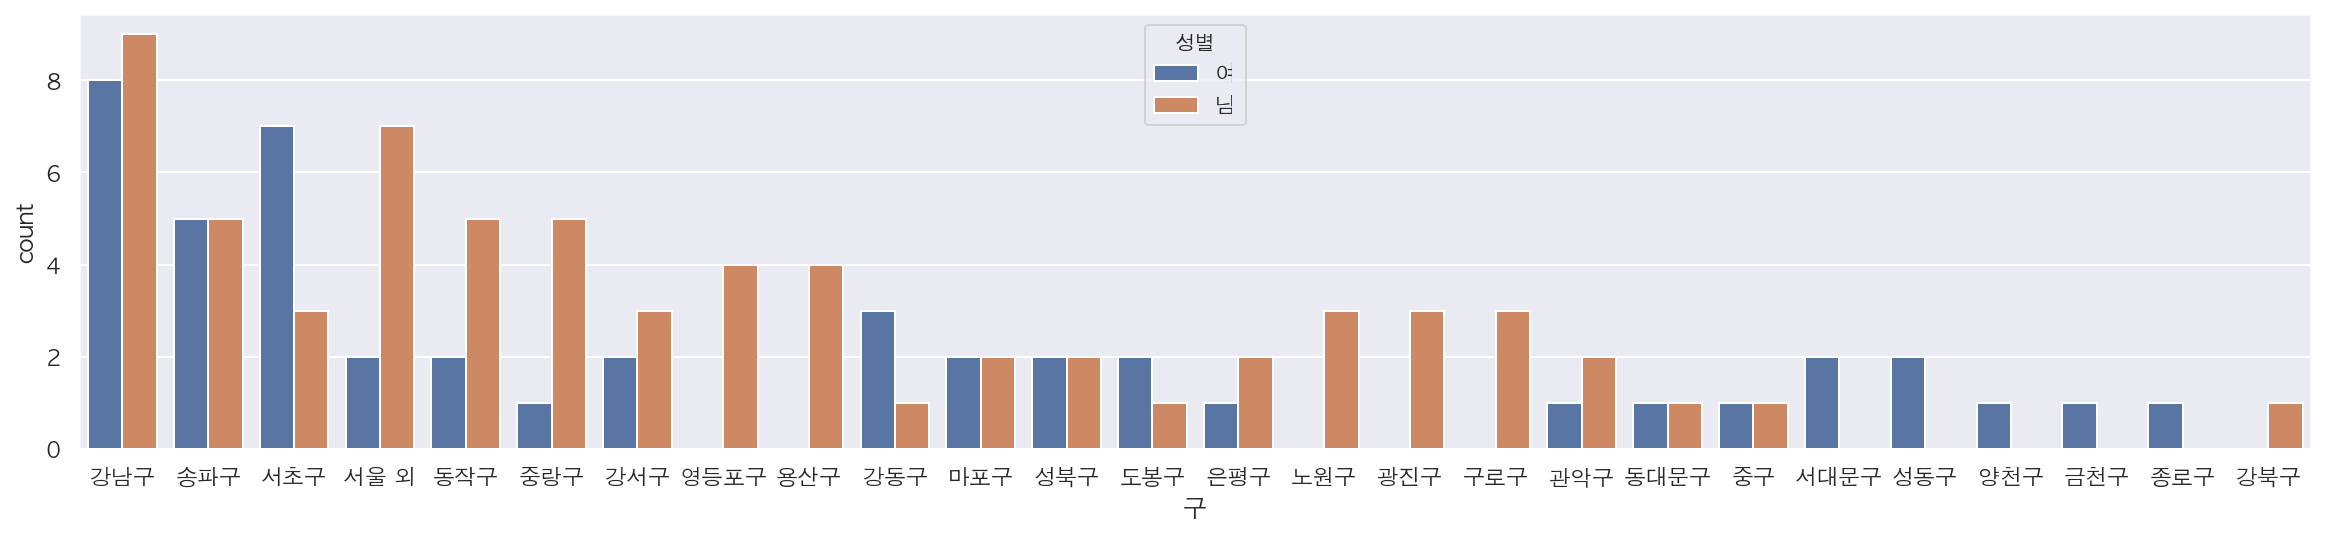

In [73]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df_oversea, x="구", hue="성별", order=gu_count.index)

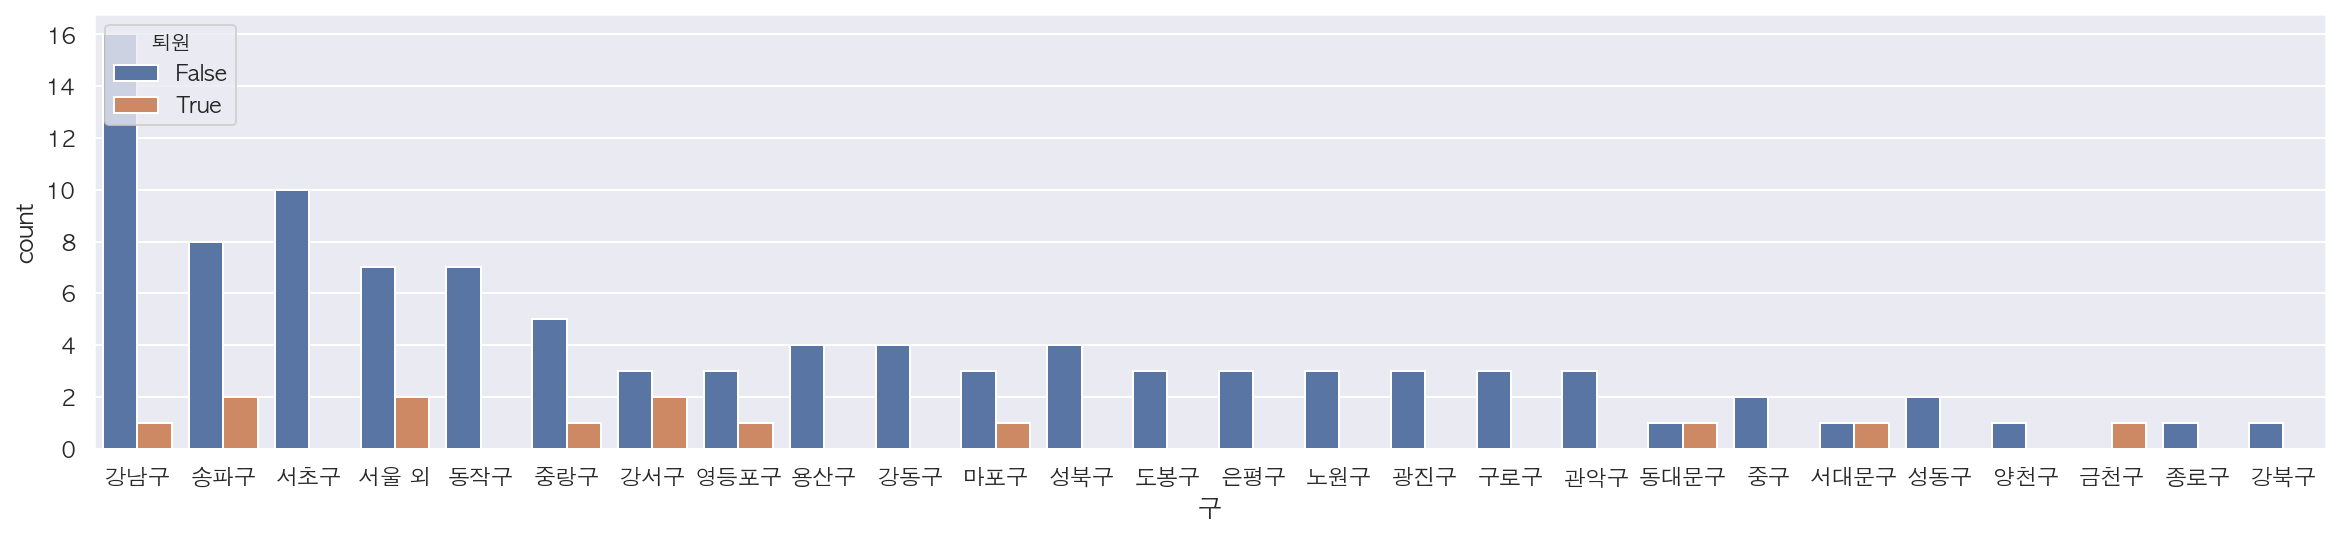

In [74]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df_oversea, x="구", hue="퇴원", order=gu_count.index)